# Hypothesis testing

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, json, time
from tqdm.notebook import tqdm_notebook
import glob
import tmdbsimple as tmdb
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
# Use glob to get all filepaths that match the pattern (*=wildcard)
tmdb_files = sorted(glob.glob("Data/fin_tmdb_data*.csv"))
tmdb_files

['Data/fin_tmdb_data_2019.csv', 'Data/fin_tmdb_data_2020.csv']

In [3]:
# Use read_csv in a list comprehension and combine with concat to load all files
df = pd.concat([pd.read_csv(f) for f in tmdb_files] )
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0385887,0.0,/xMHeU84wLQ9uH9acJ0oPgdii9wO.jpg,NaN,26000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",https://www.motherlessbrooklynfilm.com,504562.0,en,Motherless Brooklyn,...,18377736.0,145.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Motherless Brooklyn,0.0,6.704,1314.0,R
2,tt0437086,0.0,/8RKBHHRqOMOLh5qW3sS6TSFTd8h.jpg,NaN,170000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",https://family.20thcenturystudios.com/movies/a...,399579.0,en,Alita: Battle Angel,...,404980543.0,122.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,An angel falls. A warrior rises.,Alita: Battle Angel,0.0,7.219,8466.0,PG-13
3,tt0441881,0.0,/7uacpbrJd9g9xSTLgfyg1NwkAiu.jpg,NaN,23934823.0,"[{'id': 10752, 'name': 'War'}, {'id': 28, 'nam...",http://dangerclosemovie.com,508664.0,en,Danger Close: The Battle of Long Tan,...,2078370.0,119.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Outnumbered. Outgunned. Never out of courage,Danger Close: The Battle of Long Tan,0.0,6.863,281.0,R
4,tt0448115,0.0,/o7JVhqMmrex1TPbmuxl8YXVlcfl.jpg,"{'id': 724848, 'name': 'Shazam! Collection', '...",80000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",http://www.shazammovie.com,287947.0,en,Shazam!,...,366080049.0,132.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Just say the word.,Shazam!,0.0,7.032,8856.0,PG-13


In [4]:
df.describe()

,adult,budget,id,popularity,revenue,runtime,video,vote_average,vote_count
count,5538.000000,5.538000e+03,5.538000e+03,5538.000000,5.538000e+03,5538.000000,5538.000000,5538.000000,5538.000000
mean,0.001625,1.751039e+06,6.278726e+05,4.823958,5.926583e+06,94.935536,0.009570,4.861786,163.105634
std,0.040284,1.338011e+07,1.093079e+05,10.507809,6.795562e+07,32.844922,0.097367,2.665857,918.947576
min,0.000000,0.000000e+00,1.304210e+05,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,5.760275e+05,1.142250,0.000000e+00,84.000000,0.000000,3.800000,1.000000
50%,0.000000,0.000000e+00,6.142010e+05,2.001000,0.000000e+00,95.000000,0.000000,5.700000,6.000000
75%,0.000000,0.000000e+00,6.580675e+05,4.963250,0.000000e+00,109.000000,0.000000,6.700000,30.000000
max,1.000000,3.560000e+08,1.189550e+06,416.037000,2.800000e+09,1265.000000,1.000000,10.000000,23897.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5540 entries, 0 to 626
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                5540 non-null   object 
 1   adult                  5538 non-null   float64
 2   backdrop_path          4454 non-null   object 
 3   belongs_to_collection  343 non-null    object 
 4   budget                 5538 non-null   float64
 5   genres                 5538 non-null   object 
 6   homepage               1444 non-null   object 
 7   id                     5538 non-null   float64
 8   original_language      5538 non-null   object 
 9   original_title         5538 non-null   object 
 10  overview               5430 non-null   object 
 11  popularity             5538 non-null   float64
 12  poster_path            5465 non-null   object 
 13  production_companies   5538 non-null   object 
 14  production_countries   5538 non-null   object 
 15  relea

In [6]:
df.duplicated().sum()

1

In [7]:
# Remove duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [8]:
df['certification'].value_counts()

R        358
NR       297
PG-13    186
PG        99
G         26
NC-17      8
Name: certification, dtype: int64

In [9]:
df['certification'].isna().sum()

4565

In [10]:
# Dropping Null values from certification
df = df.dropna(subset=["certification"])

In [11]:
df['certification'].isna().sum()

0

In [12]:
df['revenue'].isna().sum()

0

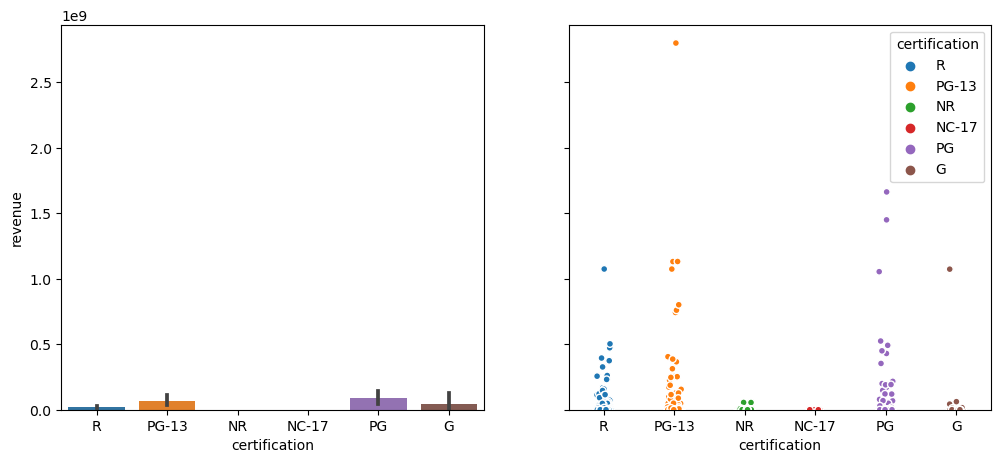

In [13]:
fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12,5))
# Plot the barplot on the left
sns.barplot(data=df, x='certification', y='revenue',ax=axes[0]);
# Plot the stripplot on the right
sns.stripplot(data=df, x='certification', y='revenue',ax=axes[1],
                   hue='certification', edgecolor='white', linewidth=1);

##  Hypothesis test 1
1. Null hypothesis: there is no difference in *revenue* between the Movie *certification* groups.
1. Alternative Hypothesis: There is a notable statistical difference in *revenue* between the *certification* groups.


###   ANOVA test

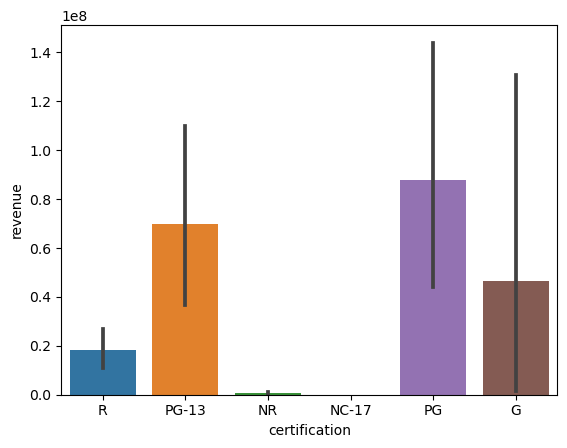

In [14]:
sns.barplot(data=df, x='certification',y='revenue');

-  We can see from this plot, that the mean *revenue* fluctuates greatly, depending upon *certification*.
 *  We will attempt to determine if this is anomalous, or correlated.
-  We will perform ANOVA testing, with post hoc Tukey's Pairwise Multiple Comparisons Test.

In [15]:
# Create  dictionary. 
groups = {}
# Loop through all unique categories
for i in df['certification'].unique():
    ## Get series for group and rename
    data = df.loc[df['certification']==i,'revenue'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['R', 'PG-13', 'NR', 'NC-17', 'PG', 'G'])

In [16]:
# Run normal test on each group and confirm there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    # save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
# convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

/opt/homebrew/Caskroom/miniforge/base/envs/dojo-env/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,n,p,test stat
R,358.0,2.226561e-120,551.019506
PG-13,186.0,3.774616e-62,282.863954
NR,297.0,9.166124e-120,548.189393
NC-17,8.0,1.034792e-05,22.957449
PG,99.0,1.059526e-27,124.223951
G,26.0,1.459239e-14,63.716553


In [17]:
# Check sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
R,358.0,2.226561e-120,551.019506,True
PG-13,186.0,3.774616e-62,282.863954,True
NR,297.0,9.166124e-120,548.189393,True
NC-17,8.0,1.034792e-05,22.957449,True
PG,99.0,1.059526e-27,124.223951,True
G,26.0,1.459239e-14,63.716553,True


In [18]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=7.812714623614939, pvalue=3.201571535591111e-07)

In [19]:
# perform the ANOVA hypothesis test
result = stats.f_oneway( *groups.values())
result

F_onewayResult(statistic=7.812714623614937, pvalue=3.201571535591111e-07)

In [20]:
# Save the values and labels 
values = df['revenue']
labels = df['certification']

In [21]:
# perform tukey's multiple comparison test 
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
G,NC-17,-46369385.0385,0.9774,-226164092.8997,133425322.8227,False
G,NR,-45834933.4391,0.7031,-136785514.0573,45115647.1791,False
G,PG,41493482.1333,0.8326,-56505112.7111,139492076.9776,False
G,PG-13,23538469.1336,0.9793,-69571010.126,116647948.3932,False
G,R,-27942730.1027,0.9505,-118267432.2765,62381972.0711,False
NC-17,NR,534451.5993,1.0,-158794909.5894,159863812.788,False
NC-17,PG,87862867.1717,0.6417,-75592208.6549,251317942.9983,False
NC-17,PG-13,69907854.172,0.8154,-90663663.6946,230479372.0387,False
NC-17,R,18426654.9358,0.9995,-140546264.2825,177399574.154,False
NR,PG,87328415.5724,0.0,35719957.4151,138936873.7296,True


##  Results
-  In this case we will reject the null hypothesis and support the alternative Hypothesis.
 *  We can see that in the cases of *PG* and *PG-13*, versus *R* and *NC-17*, that there is indeed significant statistical evidence to reject the *Null Hypothesis*. 

##  Hypothesis test 2
1. Null Hypothesis: There is no difference in *popularity*, based on *budget*.
1. Alternative Hypothesis: There is a significant statistical correlation between *budget* and *popularity*.
  * Is our spending an indicator of how well received our Movies will be by the audience?    
  ##  T-Test

In [30]:
df['popularity'].info()

<class 'pandas.core.series.Series'>
Int64Index: 974 entries, 1 to 622
Series name: popularity
Non-Null Count  Dtype  
--------------  -----  
974 non-null    float64
dtypes: float64(1)
memory usage: 47.5 KB


In [31]:
np.mean(df['popularity'])

11.981315195071868

In [43]:
sample = df.sample(n=100,random_state=42)
low_pop = sample.loc[sample['popularity'] < 11.98,"budget"]
high_pop = sample.loc[sample['popularity'] > 11.98,"budget"]
print(f" Low Popularity (n={len(low_pop)}): Mean={np.mean(low_pop):.2f}")
print(f" High Popularity (n={len(high_pop)}): Mean={np.mean(high_pop):.2f}")

 Low Popularity (n=69): Mean=535397.41
 High Popularity (n=31): Mean=14274193.55


In [44]:
zscores_f = stats.zscore(high_pop)
outliers_f = abs(zscores_f)>3
np.sum(outliers_f)

1

In [45]:
zscores_m = stats.zscore(low_pop)
outliers_m = abs(zscores_m)>3
np.sum(outliers_m)

1

In [46]:
# remove outliers from high_pop group
high_pop = high_pop[(np.abs(stats.zscore(high_pop)) < 3)]

In [48]:
# remove outliers from low_pop group
low_pop = low_pop[(np.abs(stats.zscore(low_pop)) < 3)]

In [49]:
# test the high_pop group for normality
results_high_pop = stats.normaltest(high_pop)
results_high_pop

NormaltestResult(statistic=37.26503304647268, pvalue=8.090975572372297e-09)

In [50]:
# test the low_pop group for normality
result_low_pop = stats.normaltest(low_pop)
result_low_pop

NormaltestResult(statistic=120.55988115772422, pvalue=6.618421728794096e-27)

In [51]:
result = stats.levene(high_pop, low_pop)
result

LeveneResult(statistic=13.267392950239921, pvalue=0.0004399014294662684)

In [52]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(high_pop, low_pop, equal_var = False)
result

Ttest_indResult(statistic=2.4215708114823413, pvalue=0.021936988734095105)

##  Results

-  Our P-Value (.0219) is less than the threshold of .05, therefore we can *NOT* reject our *Null Hypothesis* 
 *  It seems unlikely that our stakeholder will be able to simply "Spend Their Way" to making more popular movies.

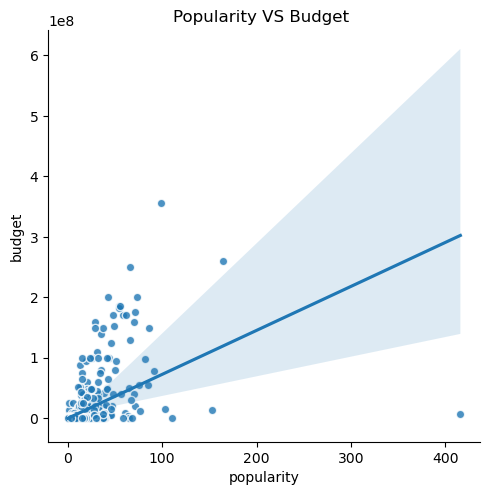

In [70]:
g = sns.lmplot(data=df, x="popularity", y="budget",
               scatter_kws=scatter_kws);
g.ax.set_title("Popularity VS Budget ");

##  Hypothesis Test 3
1. Null Hypothesis: there will be no difference in *revenue* related to a movie's *popularity*.
1. Alternative Hypothesis: A movie's *popularity* will have a direct impact on its *revenue*.
##  T-Test

In [53]:
sample = df.sample(n=100,random_state=42)
low_pop = sample.loc[sample['popularity'] < 11.98,"revenue"]
high_pop = sample.loc[sample['popularity'] > 11.98,"revenue"]
print(f" Low Popularity (n={len(low_pop)}): Mean={np.mean(low_pop):.2f}")
print(f" High Popularity (n={len(high_pop)}): Mean={np.mean(high_pop):.2f}")

 Low Popularity (n=69): Mean=561300.48
 High Popularity (n=31): Mean=63955766.13


In [55]:
zscores_h = stats.zscore(high_pop)
outliers_h = abs(zscores_h)>3
np.sum(outliers_h)

1

In [56]:
zscores_l = stats.zscore(low_pop)
outliers_l = abs(zscores_l)>3
np.sum(outliers_l)

1

In [57]:
# remove outliers from high_pop group
high_pop = high_pop[(np.abs(stats.zscore(high_pop)) < 3)]

In [58]:
# remove outliers from low_pop group
low_pop = low_pop[(np.abs(stats.zscore(low_pop)) < 3)]

In [59]:
# test the high_pop group for normality
results_high_pop = stats.normaltest(high_pop)
results_high_pop

NormaltestResult(statistic=51.86802345811007, pvalue=5.457601387274433e-12)

In [60]:
# test the low_pop group for normality
result_low_pop = stats.normaltest(low_pop)
result_low_pop

NormaltestResult(statistic=114.96817928782137, pvalue=1.0838696871019303e-25)

In [61]:
result = stats.levene(high_pop, low_pop)
result

LeveneResult(statistic=8.135001936009754, pvalue=0.005316964177030877)

In [62]:
# Independent t-test with equal_var set to False
result = stats.ttest_ind(high_pop, low_pop, equal_var = False)
result

Ttest_indResult(statistic=1.8822826014755074, pvalue=0.06986516791801375)

##  Results
-  With a P-Value (.069) greater than our 0.05 threshold, we can *reject* the Null hypothesis, in support of our Alternative Hypothesis.
 *  It appears Likely that a more popular movie will garner higher revenue.(duh).
 * More analysis is needed to determine a formula for making a movie more *popular*.

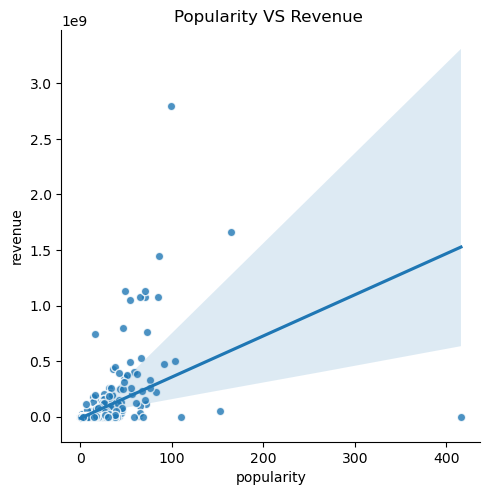

In [69]:
g = sns.lmplot(data=df, x="popularity", y="revenue",
               scatter_kws=scatter_kws);
g.ax.set_title("Popularity VS Revenue ");

## Submission